In [26]:
using Pkg
Pkg.activate("../../..")

  Activating project at `~/Documents/Git/StockFlow.jl`


In [27]:
using GraphViz

using StockFlow
using StockFlow.Syntax
using StockFlow.Syntax.Composition
using StockFlow.Syntax.Rewrite

using Catlab
using Catlab.CategoricalAlgebra
using LabelledArrays
using OrdinaryDiffEq
using Plots

using Catlab.Graphics
using Catlab.Programs
using Catlab.Theories
using Catlab.WiringDiagrams

# 1. Normoglycemic Population Model

In [28]:
Model_Normoglycemic = @stock_and_flow begin
    
    :stocks
    NormalWeight
    OverWeight
    Obese

    :parameters
    rBirth
    rMortalityWeight
    rObese
    rOverWeight
    rMortalityobese

    :flows
    NormalWeight => f_DeathNormalWeight(NormalWeight * rMortalityWeight) => CLOUD
    NormalWeight => f_BecomingOverWeight(NormalWeight * rOverWeight) => OverWeight
    OverWeight => f_DeathOverWeight(OverWeight * rMortalityWeight) => CLOUD
    OverWeight => f_BecomingObese(OverWeight * rObese) => Obese
    Obese => f_DeathObese(Obese * rMortalityobese) => CLOUD
    CLOUD => f_NewBorn(N * rBirth) => NormalWeight


    :sums
    N = [NormalWeight, OverWeight, Obese]

end

StockAndFlowF {S:3, SV:1, LS:3, F:6, I:3, O:5, V:6, LV:5, LSV:1, P:5, LVV:0, LPV:6, Name:0, Op:0, Position:0}
┌───┬──────────────┐
│ S │        sname │
├───┼──────────────┤
│ 1 │ NormalWeight │
│ 2 │   OverWeight │
│ 3 │        Obese │
└───┴──────────────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
└────┴─────┴──────┘
┌───┬────┬──────────────────────┐
│ F │ fv │                fname │
├───┼────┼──────────────────────┤
│ 1 │  1 │  f_DeathNormalWeight │
│ 2 │  2 │ f_BecomingOverWeight │
│ 3 │  3 │    f_DeathOverWeight │
│ 4 │  4 │      f_BecomingObese │
│ 5 │  5 │         f_DeathObese │
│ 6 │  6 │            f_NewBorn │
└───┴────┴──────────────────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   6 │  1 │
│ 2 │   2 │  2 │
│ 3 │   4 │  3 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  1 │
│ 3 │   3 │  2 │
│ 4 │   4 │  2 │
│ 5 │   5 │  3 │
└───┴─────┴────┘
┌───┬──────────────────────────────┬─────┐
│ V │                        vname │ vop │
├───┼──────────────────────────────┼─────┤
│ 1 │  ##v_f_DeathNormalWeight#325 │   * │
│ 2 │ ##v_f_BecomingOverWeight#326 │   * │
│ 3 │    ##v_f_DeathOverWeight#327 │   * │
│ 4 │      ##v_f_BecomingObese#328 │   * │
│ 5 │         ##v_f_DeathObese#329 │   * │
│ 6 │            ##v_f_NewBorn#330 │   * │
└───┴──────────────────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   1 │   1 │           1 │
│  2 │   1 │   2 │           1 │
│  3 │   2 │   3 │           1 │
│  4 │   2 │   4 │           1 │
│  5 │   3 │   5 │           1 │
└────┴─────┴─────┴─────────────┘
┌─────┬───────┬──────┬───────────────┐
│ LSV │ lsvsv │ lsvv │ lsvsvposition │
├─────┼───────┼──────┼───────────────┤
│   1 │     1 │    6 │             1 │
└─────┴───────┴──────┴───────────────┘
┌───┬──────────────────┐
│ P │            pname │
├───┼──────────────────┤
│ 1 │           rBirth │
│ 2 │ rMortalityWeight │
│ 3 │           rObese │
│ 4 │      rOverWeight │
│ 5 │  rMortalityobese │
└───┴──────────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    2 │    1 │            2 │
│   2 │    4 │    2 │            2 │
│   3 │    2 │    3 │            2 │
│   4 │    3 │    4 │            2 │
│   5 │    5 │    5 │            2 │
│   6 │    1 │    6 │            2 │
└─────┴──────┴──────┴──────────────┘

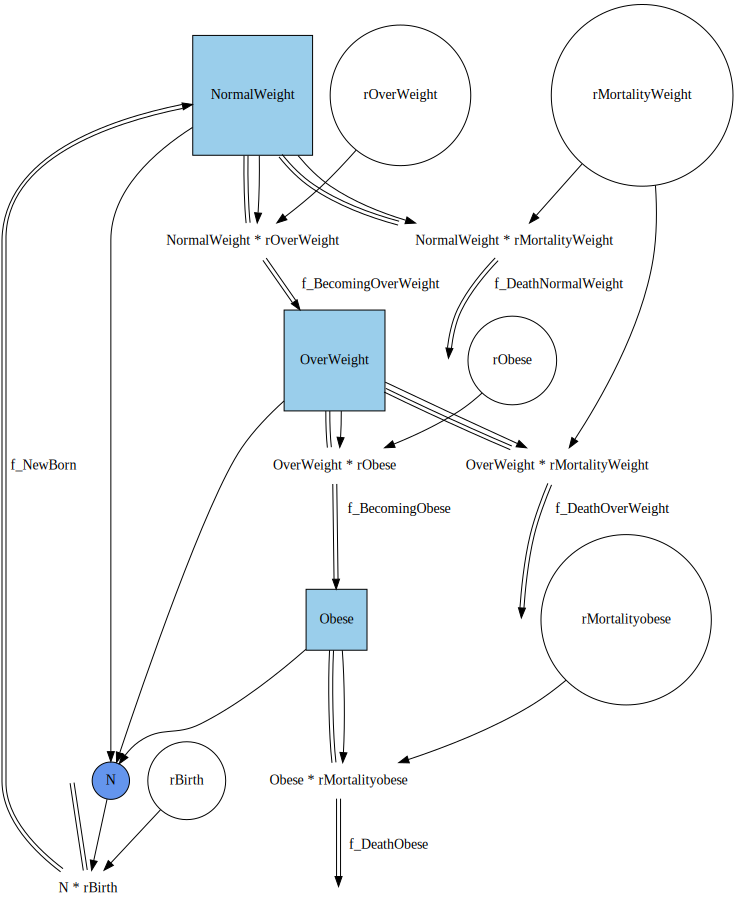

In [29]:
GraphF(Model_Normoglycemic, rd="TB")

# 2. Hyperglycemic Population Model
## 2.1 Build Development of Hyperglyce Sub Model Structure

In [30]:
SubHyperglycemic = @stock_and_flow begin
    :stocks
    Prediabetic
    DiabeticWtComp
    DiabeticEarly
    DiabeticLate


    :parameters
    rDevelopingDiabetic
    rMortalityPrediabetic
    rDevelopingEarly
    rMortalityDiabeticEarly
    rMortalityDiabeticLate
    rMortalityDiabeticWtComp
    rDevelopingLate

    :dynamic_variables
    v_DevelopingDiabetic = Prediabetic * rDevelopingDiabetic
    v_DeathPrediabetic = Prediabetic * rMortalityPrediabetic
    v_DevelopingEarly = DiabeticWtComp * rDevelopingEarly
    v_DeathDiabeticWtComp = DiabeticWtComp * rMortalityDiabeticWtComp
    v_DevelopingLate = DiabeticEarly * rDevelopingLate
    v_DeathDiabeticEarly = DiabeticEarly * rMortalityDiabeticEarly
    v_DeathDiabeticLate = DiabeticLate * rMortalityDiabeticLate

    :flows
    Prediabetic => DevelopingDiabetic(v_DevelopingDiabetic) => DiabeticWtComp
    Prediabetic => DeathPrediabetic(v_DeathPrediabetic) => CLOUD
    DiabeticWtComp => DevelopingEarly(v_DevelopingEarly) => DiabeticEarly
    DiabeticWtComp => DeathDiabeticWtComp(v_DeathDiabeticWtComp) => CLOUD
    DiabeticEarly => DevelopingLate(v_DevelopingLate) => DiabeticLate
    DiabeticEarly => DeathDiabeticEarly(v_DeathDiabeticEarly) => CLOUD
    DiabeticLate => DeathDiabeticLate(v_DeathDiabeticLate) => CLOUD

    :sums
    N = [Prediabetic,  DiabeticWtComp, DiabeticEarly, DiabeticLate]


end

StockAndFlowF {S:4, SV:1, LS:4, F:7, I:3, O:7, V:7, LV:7, LSV:0, P:7, LVV:0, LPV:7, Name:0, Op:0, Position:0}
┌───┬────────────────┐
│ S │          sname │
├───┼────────────────┤
│ 1 │    Prediabetic │
│ 2 │ DiabeticWtComp │
│ 3 │  DiabeticEarly │
│ 4 │   DiabeticLate │
└───┴────────────────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
│  4 │   4 │    1 │
└────┴─────┴──────┘
┌───┬────┬─────────────────────┐
│ F │ fv │               fname │
├───┼────┼─────────────────────┤
│ 1 │  1 │  DevelopingDiabetic │
│ 2 │  2 │    DeathPrediabetic │
│ 3 │  3 │     DevelopingEarly │
│ 4 │  4 │ DeathDiabeticWtComp │
│ 5 │  5 │      DevelopingLate │
│ 6 │  6 │  DeathDiabeticEarly │
│ 7 │  7 │   DeathDiabeticLate │
└───┴────┴─────────────────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
│ 2 │   3 │  3 │
│ 3 │   5 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
│ 2 │   2 │  1 │
│ 3 │   3 │  2 │
│ 4 │   4 │  2 │
│ 5 │   5 │  3 │
│ 6 │   6 │  3 │
│ 7 │   7 │  4 │
└───┴─────┴────┘
┌───┬───────────────────────┬─────┐
│ V │                 vname │ vop │
├───┼───────────────────────┼─────┤
│ 1 │  v_DevelopingDiabetic │   * │
│ 2 │    v_DeathPrediabetic │   * │
│ 3 │     v_DevelopingEarly │   * │
│ 4 │ v_DeathDiabeticWtComp │   * │
│ 5 │      v_DevelopingLate │   * │
│ 6 │  v_DeathDiabeticEarly │   * │
│ 7 │   v_DeathDiabeticLate │   * │
└───┴───────────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   1 │   1 │           1 │
│  2 │   1 │   2 │           1 │
│  3 │   2 │   3 │           1 │
│  4 │   2 │   4 │           1 │
│  5 │   3 │   5 │           1 │
│  6 │   3 │   6 │           1 │
│  7 │   4 │   7 │           1 │
└────┴─────┴─────┴─────────────┘
┌───┬──────────────────────────┐
│ P │                    pname │
├───┼──────────────────────────┤
│ 1 │      rDevelopingDiabetic │
│ 2 │    rMortalityPrediabetic │
│ 3 │         rDevelopingEarly │
│ 4 │  rMortalityDiabeticEarly │
│ 5 │   rMortalityDiabeticLate │
│ 6 │ rMortalityDiabeticWtComp │
│ 7 │          rDevelopingLate │
└───┴──────────────────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    1 │            2 │
│   2 │    2 │    2 │            2 │
│   3 │    3 │    3 │            2 │
│   4 │    6 │    4 │            2 │
│   5 │    7 │    5 │            2 │
│   6 │    4 │    6 │            2 │
│   7 │    5 │    7 │            2 │
└─────┴──────┴──────┴──────────────┘

In [31]:
function fSubHyperglycemic(pop)
    new_SubHyperglycemic = deepcopy(SubHyperglycemic)
    add_suffix!(new_SubHyperglycemic, pop)
    set_svname!(new_SubHyperglycemic, 1, :N)
    return new_SubHyperglycemic
end

fSubHyperglycemic (generic function with 1 method)

## 2.2 Build Diagnosis of Hyperglycemic Sub Model Structure

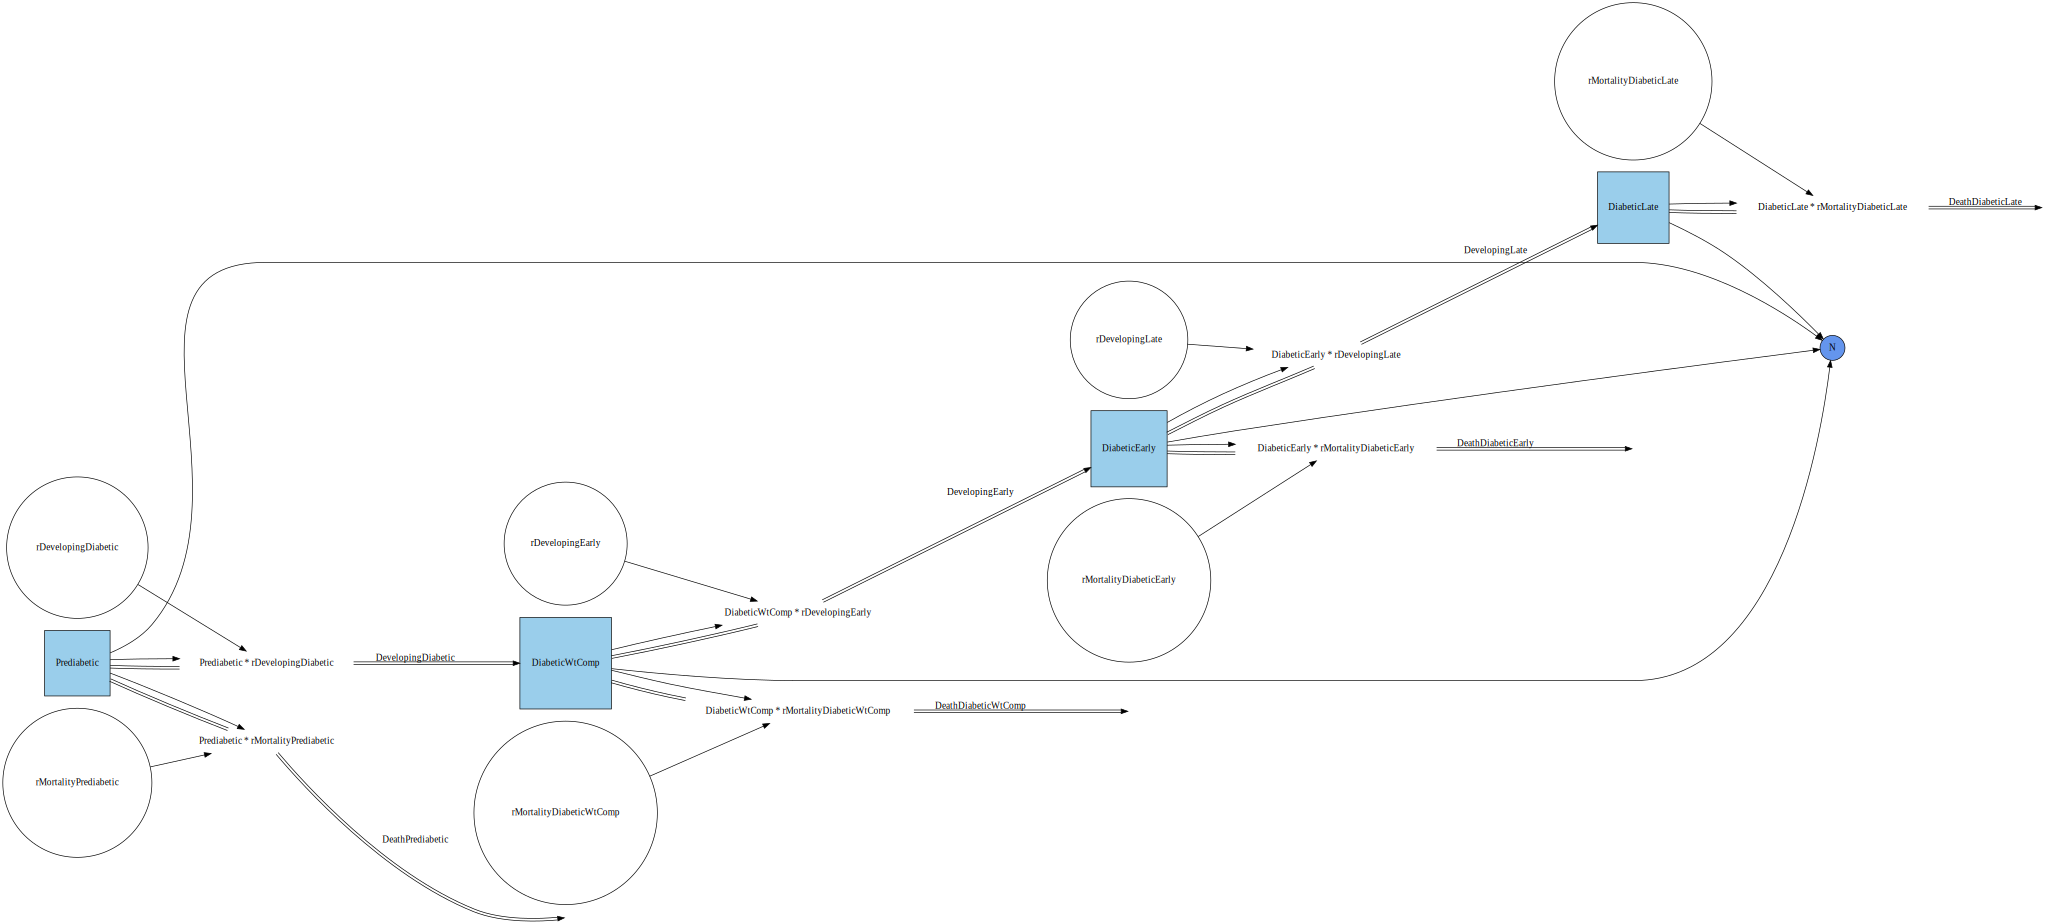

In [32]:
GraphF(SubHyperglycemic)

In [33]:
subDiagnosis = @stock_and_flow begin
    :stocks
    U
    D

    :parameters
    r

    :dynamic_variables
    v_diagnosis = U * r

    :flows
    U => f_diagnosis(v_diagnosis) => D

    :sums
    N = [U, D]
end

StockAndFlowF {S:2, SV:1, LS:2, F:1, I:1, O:1, V:1, LV:1, LSV:0, P:1, LVV:0, LPV:1, Name:0, Op:0, Position:0}
┌───┬───────┐
│ S │ sname │
├───┼───────┤
│ 1 │     U │
│ 2 │     D │
└───┴───────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
└────┴─────┴──────┘
┌───┬────┬─────────────┐
│ F │ fv │       fname │
├───┼────┼─────────────┤
│ 1 │  1 │ f_diagnosis │
└───┴────┴─────────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   1 │  2 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   1 │  1 │
└───┴─────┴────┘
┌───┬─────────────┬─────┐
│ V │       vname │ vop │
├───┼─────────────┼─────┤
│ 1 │ v_diagnosis │   * │
└───┴─────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   1 │   1 │           1 │
└────┴─────┴─────┴─────────────┘
┌───┬───────┐
│ P │ pname │
├───┼───────┤
│ 1 │     r │
└───┴───────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    1 │            2 │
└─────┴──────┴──────┴──────────────┘

In [34]:
function fsubDiagnosis(s)
    new_subDiagnosis = deepcopy(subDiagnosis)
    set_snames!(new_subDiagnosis, [Symbol(s, :_U), Symbol(s, :_D)])
    set_pname!(new_subDiagnosis, 1, Symbol(:r,s))
    set_fname!(new_subDiagnosis, 1, Symbol("f_diagnosis", s))
    set_vname!(new_subDiagnosis, 1, Symbol("v_diagnosis", s))
    return new_subDiagnosis
end

fsubDiagnosis (generic function with 1 method)

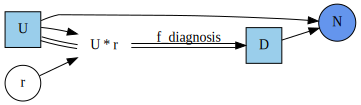

In [35]:
GraphF(subDiagnosis)

## 2.3 Generate Hyperglycemic Model by Composition

In [36]:
using StockFlow.Syntax.Composition

In [37]:
HypU, HypD, SubPre, SubComp, SubEarly, SubLate = fSubHyperglycemic("_U"),fSubHyperglycemic("_D"),fsubDiagnosis("Prediabetic"),fsubDiagnosis("DiabeticWtComp"),fsubDiagnosis("DiabeticEarly"),fsubDiagnosis("DiabeticLate");

In [38]:
Model_Hyperglycemic = @compose HypU HypD SubPre SubComp SubEarly SubLate begin
    (HypU, HypD, SubPre, SubComp, SubEarly, SubLate)

    (HypU, SubPre) ^ Prediabetic_U => N
    (HypU, SubComp) ^ DiabeticWtComp_U => N
    (HypU, SubEarly) ^ DiabeticEarly_U => N
    (HypU, SubLate) ^ DiabeticLate_U => N

    (HypD, SubPre) ^ Prediabetic_D => N
    (HypD, SubComp) ^ DiabeticWtComp_D => N
    (HypD, SubEarly) ^ DiabeticEarly_D => N
    (HypD, SubLate) ^ DiabeticLate_D => N


end

S,sname
1,Prediabetic_U
2,DiabeticWtComp_U
3,DiabeticEarly_U
4,DiabeticLate_U
5,Prediabetic_D
6,DiabeticWtComp_D
7,DiabeticEarly_D
8,DiabeticLate_D
SV,svname
1,N


# 3. Connection between Normoglycemic and Hyperglycemic Population Model

In [39]:
Model_Norm_Hyper = @stock_and_flow begin
    
    :stocks
    NormalWeight
    OverWeight
    Obese
    Prediabetic_U
    Prediabetic_D

    :parameters
    rRecovery
    rIncidenceNW
    rIncidenceOW
    rIncidenceOB

    :flows
    Prediabetic_D => fRecoveryToOWFromDx(Prediabetic_D * rRecovery) => OverWeight
    Prediabetic_D => fRecoveryToNWFromDx(Prediabetic_D * rRecovery) => NormalWeight
    Prediabetic_D => fRecoveryToOBFromDx(Prediabetic_D * rRecovery) => Obese

    NormalWeight => fDevelopingPrediabeticNW(NormalWeight * rIncidenceNW) => Prediabetic_U

    Prediabetic_U => fRecoveryToOWFromUx(Prediabetic_U * rRecovery) => OverWeight
    Prediabetic_U => fRecoveryToOBFromUx(Prediabetic_U * rRecovery) => Obese
    Prediabetic_U => fRecoveryToNWFromUx(Prediabetic_U * rRecovery) => NormalWeight

    OverWeight => fDevelopingPrediabeticOW(OverWeight * rIncidenceOW) => Prediabetic_U

    Obese => fDevelopingPrediabeticOB(Obese * rIncidenceOB) => Prediabetic_U

    :sums
    N = [NormalWeight, OverWeight, Obese, Prediabetic_U, Prediabetic_D]


end

StockAndFlowF {S:5, SV:1, LS:5, F:9, I:9, O:9, V:9, LV:9, LSV:0, P:4, LVV:0, LPV:9, Name:0, Op:0, Position:0}
┌───┬───────────────┐
│ S │         sname │
├───┼───────────────┤
│ 1 │  NormalWeight │
│ 2 │    OverWeight │
│ 3 │         Obese │
│ 4 │ Prediabetic_U │
│ 5 │ Prediabetic_D │
└───┴───────────────┘
┌────┬────────┐
│ SV │ svname │
├────┼────────┤
│  1 │      N │
└────┴────────┘
┌────┬─────┬──────┐
│ LS │ lss │ lssv │
├────┼─────┼──────┤
│  1 │   1 │    1 │
│  2 │   2 │    1 │
│  3 │   3 │    1 │
│  4 │   4 │    1 │
│  5 │   5 │    1 │
└────┴─────┴──────┘
┌───┬────┬──────────────────────────┐
│ F │ fv │                    fname │
├───┼────┼──────────────────────────┤
│ 1 │  1 │      fRecoveryToOWFromDx │
│ 2 │  2 │      fRecoveryToNWFromDx │
│ 3 │  3 │      fRecoveryToOBFromDx │
│ 4 │  4 │ fDevelopingPrediabeticNW │
│ 5 │  5 │      fRecoveryToOWFromUx │
│ 6 │  6 │      fRecoveryToOBFromUx │
│ 7 │  7 │      fRecoveryToNWFromUx │
│ 8 │  8 │ fDevelopingPrediabeticOW │
│ 9 │  9 │ fDevelopingPrediabeticOB │
└───┴────┴──────────────────────────┘
┌───┬─────┬────┐
│ I │ ifn │ is │
├───┼─────┼────┤
│ 1 │   2 │  1 │
│ 2 │   7 │  1 │
│ 3 │   1 │  2 │
│ 4 │   5 │  2 │
│ 5 │   3 │  3 │
│ 6 │   6 │  3 │
│ 7 │   4 │  4 │
│ 8 │   8 │  4 │
│ 9 │   9 │  4 │
└───┴─────┴────┘
┌───┬─────┬────┐
│ O │ ofn │ os │
├───┼─────┼────┤
│ 1 │   4 │  1 │
│ 2 │   8 │  2 │
│ 3 │   9 │  3 │
│ 4 │   5 │  4 │
│ 5 │   6 │  4 │
│ 6 │   7 │  4 │
│ 7 │   1 │  5 │
│ 8 │   2 │  5 │
│ 9 │   3 │  5 │
└───┴─────┴────┘
┌───┬──────────────────────────────────┬─────┐
│ V │                            vname │ vop │
├───┼──────────────────────────────────┼─────┤
│ 1 │      ##v_fRecoveryToOWFromDx#340 │   * │
│ 2 │      ##v_fRecoveryToNWFromDx#341 │   * │
│ 3 │      ##v_fRecoveryToOBFromDx#342 │   * │
│ 4 │ ##v_fDevelopingPrediabeticNW#343 │   * │
│ 5 │      ##v_fRecoveryToOWFromUx#344 │   * │
│ 6 │      ##v_fRecoveryToOBFromUx#345 │   * │
│ 7 │      ##v_fRecoveryToNWFromUx#346 │   * │
│ 8 │ ##v_fDevelopingPrediabeticOW#347 │   * │
│ 9 │ ##v_fDevelopingPrediabeticOB#348 │   * │
└───┴──────────────────────────────────┴─────┘
┌────┬─────┬─────┬─────────────┐
│ LV │ lvs │ lvv │ lvsposition │
├────┼─────┼─────┼─────────────┤
│  1 │   5 │   1 │           1 │
│  2 │   5 │   2 │           1 │
│  3 │   5 │   3 │           1 │
│  4 │   1 │   4 │           1 │
│  5 │   4 │   5 │           1 │
│  6 │   4 │   6 │           1 │
│  7 │   4 │   7 │           1 │
│  8 │   2 │   8 │           1 │
│  9 │   3 │   9 │           1 │
└────┴─────┴─────┴─────────────┘
┌───┬──────────────┐
│ P │        pname │
├───┼──────────────┤
│ 1 │    rRecovery │
│ 2 │ rIncidenceNW │
│ 3 │ rIncidenceOW │
│ 4 │ rIncidenceOB │
└───┴──────────────┘
┌─────┬──────┬──────┬──────────────┐
│ LPV │ lpvp │ lpvv │ lpvpposition │
├─────┼──────┼──────┼──────────────┤
│   1 │    1 │    1 │            2 │
│   2 │    1 │    2 │            2 │
│   3 │    1 │    3 │            2 │
│   4 │    2 │    4 │            2 │
│   5 │    1 │    5 │            2 │
│   6 │    1 │    6 │            2 │
│   7 │    1 │    7 │            2 │
│   8 │    3 │    8 │            2 │
│   9 │    4 │    9 │            2 │
└─────┴──────┴──────┴──────────────┘

# 4 Generate Final Diabetes Model by Composition

In [40]:
Diabetes_Model = @compose Model_Normoglycemic Model_Hyperglycemic Model_Norm_Hyper begin
    (Normo, Hyper, NH)
    
    (Normo, NH) ^ NormalWeight => N
    (Normo, NH) ^ OverWeight => N
    (Normo, NH) ^ Obese => N

    (Hyper, NH) ^ Prediabetic_U => N
    (Hyper, NH) ^ Prediabetic_D => N

end


S,sname
1,NormalWeight
2,OverWeight
3,Obese
4,Prediabetic_U
5,DiabeticWtComp_U
6,DiabeticEarly_U
7,DiabeticLate_U
8,Prediabetic_D
9,DiabeticWtComp_D
10,DiabeticEarly_D


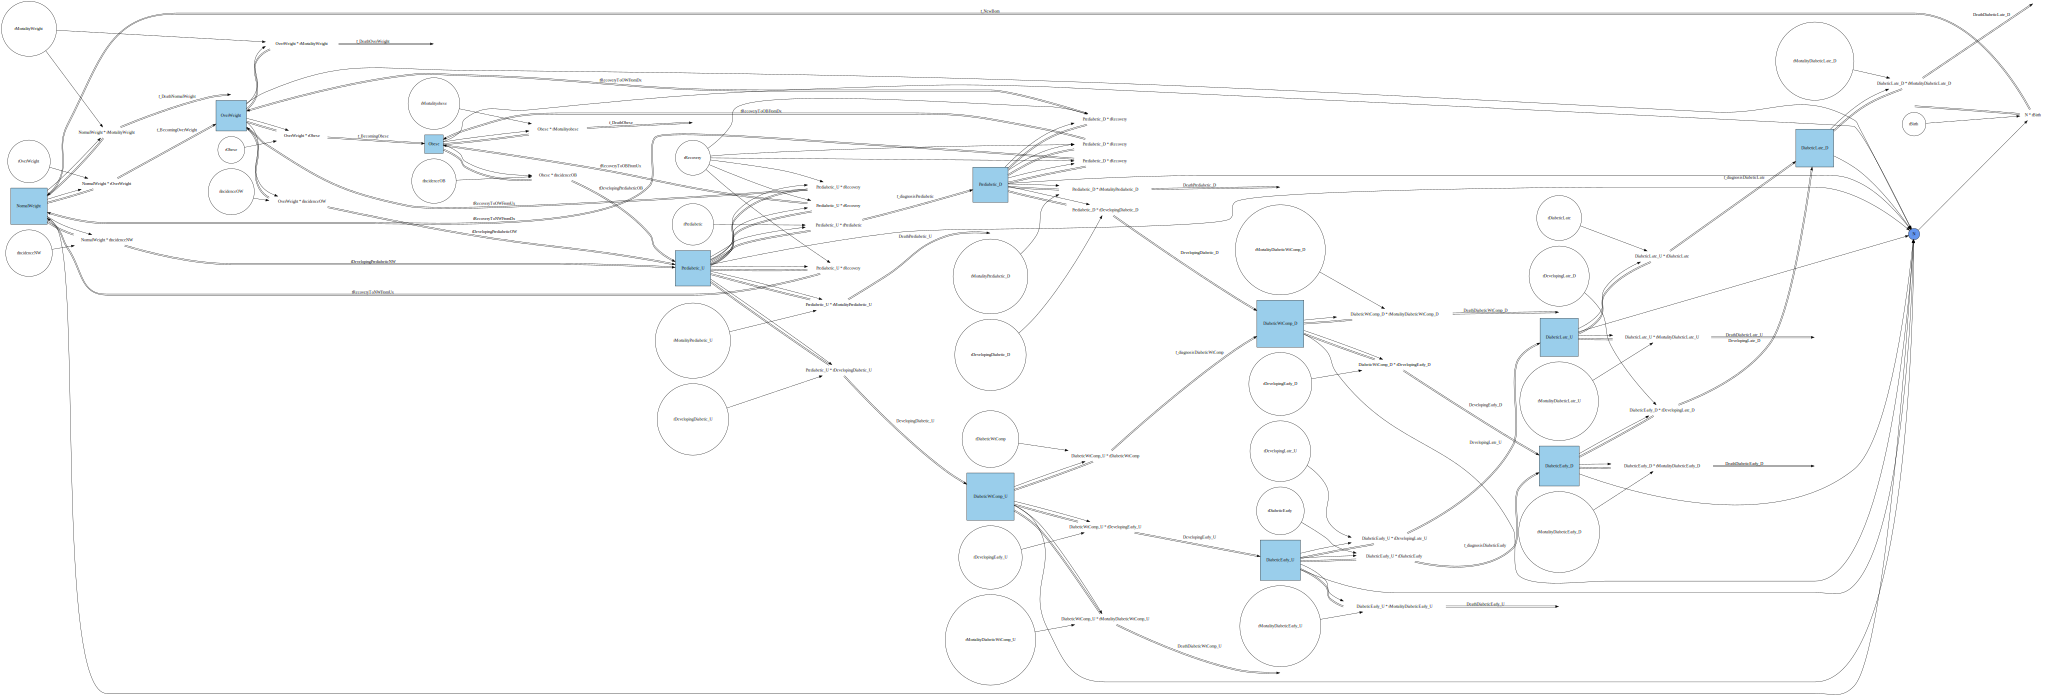

In [41]:
GraphF(Diabetes_Model)

In [42]:
Diabetes_Model

S,sname
1,NormalWeight
2,OverWeight
3,Obese
4,Prediabetic_U
5,DiabeticWtComp_U
6,DiabeticEarly_U
7,DiabeticLate_U
8,Prediabetic_D
9,DiabeticWtComp_D
10,DiabeticEarly_D


In [43]:
# Alternatively, instead of adding new parameters, you can rename one of the old ones:
# set_pname!(Diabetes_Model, 7, :rMortalityPrediabetic)
# set_pname!(Diabetes_Model, 10, :rMortalityDiabeticLate)
# set_pname!(Diabetes_Model, 12, :rDevelopingLate)

In [44]:
rewritten_diabetes = @rewrite Diabetes_Model begin
    :parameters
    rMortalityPrediabetic
    rMortalityDiabeticLate
    rDevelopingLate

    :redefs
    v_DeathPrediabetic_D = Prediabetic_D * rMortalityPrediabetic
    v_DeathDiabeticLate_D = DiabeticLate_D * rMortalityDiabeticLate
    v_DevelopingLate_D = DiabeticEarly_D * rDevelopingLate

    v_DeathPrediabetic_U = Prediabetic_U * rMortalityPrediabetic
    v_DeathDiabeticLate_U = DiabeticLate_U * rMortalityDiabeticLate
    v_DevelopingLate_U = DiabeticEarly_U * rDevelopingLate

    :removes
    rMortalityPrediabetic_D
    rMortalityDiabeticLate_D
    rDevelopingLate_D

    rMortalityPrediabetic_U
    rMortalityDiabeticLate_U
    rDevelopingLate_U

end

S,sname
1,Prediabetic_D
2,DiabeticEarly_D
3,Prediabetic_U
4,DiabeticLate_U
5,DiabeticEarly_U
6,DiabeticLate_D
7,NormalWeight
8,OverWeight
9,Obese
10,DiabeticWtComp_U


In [45]:
p = LVector(
    rBirth=12.5/1000, rMortalityWeight=4.0/1000, rOverWeight=0.03, rObese=0.06, rMortalityobese=13.0/1000,
    rDevelopingDiabetic_U=1.0/10.0, rDevelopingDiabetic_D=1.0/15.0, rMortalityPrediabetic=13.0/1000,
    rDevelopingEarly_U=1.0/10.0, rDevelopingEarly_D=1.0/15.0, rMortalityDiabeticWtComp_U=0.03, rMortalityDiabeticWtComp_D=0.027,
    rDevelopingLate=0.9, rMortalityDiabeticEarly_U=0.04+0.02, rMortalityDiabeticEarly_D=0.036+0.02,rMortalityDiabeticLate=0.04,
    rPrediabetic=0.1, rDiabeticWtComp=0.24, rDiabeticEarly=0.4, rDiabeticLate=0.6, rRecovery=0.03,
    rIncidenceNW=0.01, rIncidenceOW=0.017, rIncidenceOB=0.026
)
u0 = LVector(
    NormalWeight=95811.0, OverWeight=27709.0, Obese=30770.0, Prediabetic_U=13615.0, Prediabetic_D=2000.0,
    DiabeticWtComp_U=6396.0, DiabeticWtComp_D=3000.0, DiabeticEarly_U=0.0, DiabeticEarly_D=1200.0,
    DiabeticLate_U=0.0, DiabeticLate_D=800.0 
)

11-element LArray{Float64, 1, Vector{Float64}, (:NormalWeight, :OverWeight, :Obese, :Prediabetic_U, :Prediabetic_D, :DiabeticWtComp_U, :DiabeticWtComp_D, :DiabeticEarly_U, :DiabeticEarly_D, :DiabeticLate_U, :DiabeticLate_D)}:
     :NormalWeight => 95811.0
       :OverWeight => 27709.0
            :Obese => 30770.0
    :Prediabetic_U => 13615.0
    :Prediabetic_D => 2000.0
 :DiabeticWtComp_U => 6396.0
 :DiabeticWtComp_D => 3000.0
  :DiabeticEarly_U => 0.0
  :DiabeticEarly_D => 1200.0
   :DiabeticLate_U => 0.0
   :DiabeticLate_D => 800.0

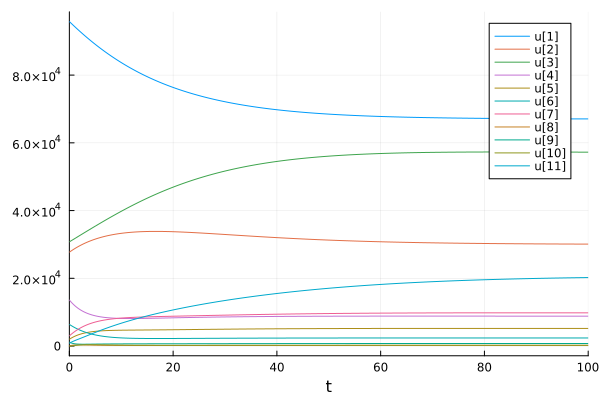

In [46]:
# results have been tested correct (same as the Anylogic model)
prob_diabetes = ODEProblem(vectorfield(rewritten_diabetes),u0,(0.0,100.0),p);
sol_diabetes = solve(prob_diabetes,Tsit5(),abstol=1e-8);
plot(sol_diabetes)

In [47]:
# to have the figures plotted fix to the wider of the cells
HTML("""
<style>
.output_svg div{
  width: 100% !important;
  height: 100% !important;
}
</style>
""")


HTML{String}("<style>\n.output_svg div{\n  width: 100% !important;\n  height: 100% !important;\n}\n</style>\n")